In [1]:
###########################################################################
## RDROBUST Python Package
## Script for Empirical Illustration
## Authors: Sebastian Calonico, Matias D. Cattaneo,
##          Max H. Farrell, Ricardo Masini and Rocio Titiunik 
###########################################################################

### Load RDROBUST package
from rdrobust import rdrobust,rdbwselect,rdplot
import pandas as pd

In [4]:
### Load data base
rdrobust_senate = pd.read_csv("../data/csv/rdrobust_senate.csv")
rdrobust_senate.head()

,state,year,vote,margin,class,termshouse,termssenate,population
0,1,1914,36.097572,-7.688561,3,3.0,6.0,1233000
1,1,1916,45.468746,-3.923708,1,0.0,4.0,1294000
2,1,1922,45.598213,-6.868660,1,0.0,7.0,1431000
3,1,1926,48.476063,-27.668056,3,0.0,3.0,1531000
4,1,1928,51.746868,-8.256968,1,0.0,1.0,1577000


In [5]:
# Define the variblrs
margin = rdrobust_senate.margin
vote = rdrobust_senate.vote

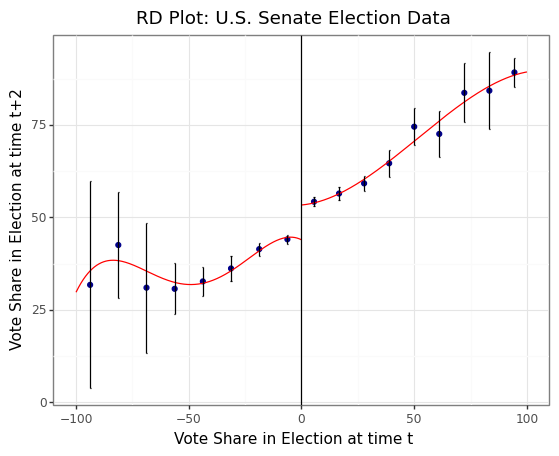


Call: rdplot
Number of Observations:                  1297
Kernel:                               Uniform
Polynomial Order Est. (p):                  4

                                Left      Right
------------------------------------------------
Number of Observations           595        702
Number of Effective Obs          595        702
Bandwith poly. fit (h)         100.0      100.0
Number of bins scale               1          1
Bins Selected                      8          9
Average Bin Length              12.5     11.111
Median Bin Length               12.5     11.111
IMSE-optimal bins                8.0        9.0
Mimicking Variance bins         15.0       35.0

Relative to IMSE-optimal:
Implied scale                    1.0        1.0
WIMSE variance weight            0.5        0.5
WIMSE bias weight                0.5        0.5


In [6]:
### rdplot with 95% confidence intervals
rdplot(y=vote, x=margin, binselect="es", ci=95, 
         title="RD Plot: U.S. Senate Election Data", 
         y_label="Vote Share in Election at time t+2",
         x_label="Vote Share in Election at time t")

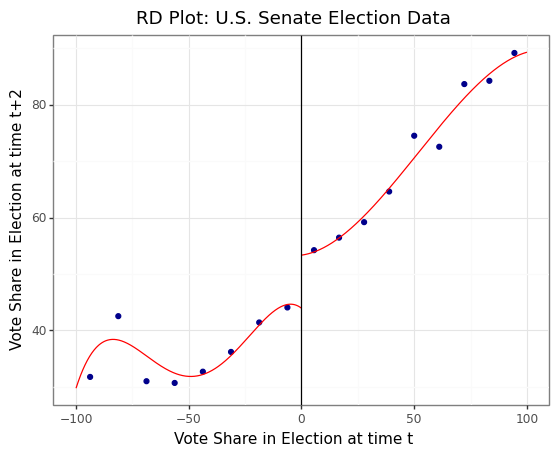


Call: rdplot
Number of Observations:                  1297
Kernel:                               Uniform
Polynomial Order Est. (p):                  4

                                Left      Right
------------------------------------------------
Number of Observations           595        702
Number of Effective Obs          595        702
Bandwith poly. fit (h)         100.0      100.0
Number of bins scale               1          1
Bins Selected                      8          9
Average Bin Length              12.5     11.111
Median Bin Length               12.5     11.111
IMSE-optimal bins                8.0        9.0
Mimicking Variance bins         15.0       35.0

Relative to IMSE-optimal:
Implied scale                    1.0        1.0
WIMSE variance weight            0.5        0.5
WIMSE bias weight                0.5        0.5


In [7]:
### rdplot with MSE-optimal choice
rdplot(y=vote, x=margin, binselect="es", 
       title="RD Plot: U.S. Senate Election Data", 
       y_label="Vote Share in Election at time t+2",
       x_label="Vote Share in Election at time t")

In [8]:
### rdplot with QS partitioning and mimicking variance choice
rdplot(y=vote, x=margin, binselect="qsmv", 
       title="RD Plot: U.S. Senate Election Data", 
       y_label="Vote Share in Election at time t+2",
       x_label="Vote Share in Election at time t")

IndexError: index 28 is out of bounds for axis 0 with size 28

In [14]:
print(rdrobust(y=vote, x=margin))

Call: rdrobust
Number of Observations:                  1297
Polynomial Order Est. (p):                  1
Polynomial Order Bias (q):                  2
Kernel:                            Triangular
Bandwidth Selection:                    mserd
Var-Cov Estimator:                         NN

                                Left      Right
------------------------------------------------
Number of Observations           595        702
Number of Unique Obs.            595        665
Number of Effective Obs.         360        323
Bandwidth Estimation          17.754     17.754
Bandwidth Bias                28.028     28.028
rho (h/b)                      0.633      0.633

Method             Coef.     S.E.   t-stat    P>|t|       95% CI      
-------------------------------------------------------------------------
Conventional       7.414    1.459    5.083   3.722e-07    [4.555, 10.273]
Robust                 -        -    4.311   1.625e-05    [4.094, 10.919]



In [15]:
print(rdrobust(y=vote, x=margin, all=True))

Call: rdrobust
Number of Observations:                  1297
Polynomial Order Est. (p):                  1
Polynomial Order Bias (q):                  2
Kernel:                            Triangular
Bandwidth Selection:                    mserd
Var-Cov Estimator:                         NN

                                Left      Right
------------------------------------------------
Number of Observations           595        702
Number of Unique Obs.            595        665
Number of Effective Obs.         360        323
Bandwidth Estimation          17.754     17.754
Bandwidth Bias                28.028     28.028
rho (h/b)                      0.633      0.633

Method             Coef.     S.E.   t-stat    P>|t|       95% CI      
-------------------------------------------------------------------------
Conventional       7.414    1.459    5.083   3.722e-07    [4.555, 10.273]
Bias-Corrected     7.507    1.459    5.146   2.661e-07    [4.647, 10.366]
Robust             7.507    1

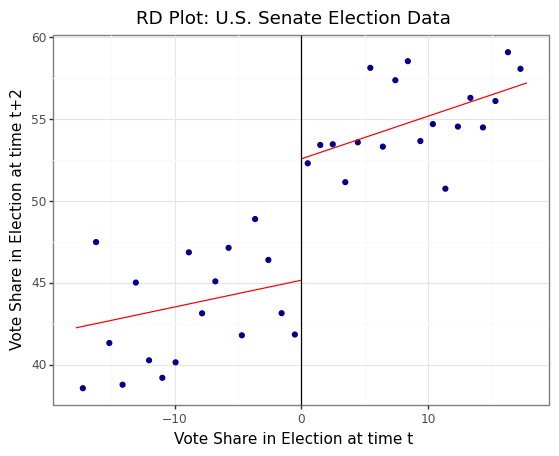


Call: rdplot
Number of Observations:                   683
Kernel:                            Triangular
Polynomial Order Est. (p):                  1

                                Left      Right
------------------------------------------------
Number of Observations           360        323
Number of Effective Obs          360        323
Bandwith poly. fit (h)        17.754     17.754
Number of bins scale               1          1
Bins Selected                     17         18
Average Bin Length             1.044      0.985
Median Bin Length              1.044      0.985
IMSE-optimal bins                8.0        6.0
Mimicking Variance bins         17.0       18.0

Relative to IMSE-optimal:
Implied scale                  2.125        3.0
WIMSE variance weight          0.094      0.036
WIMSE bias weight              0.906      0.964


In [17]:
## rdplot to show rdrobust estimate
est = rdrobust(y=vote, x=margin)
h_l, h_r = est.bws.loc['h', :].values
subset = ((-h_l<= margin) & (margin <= h_r)).values

rdplot(y=vote, x=margin, subset=subset,
       binselect="esmv", kernel="triangular", h=[h_l,h_r], p=1,
       title="RD Plot: U.S. Senate Election Data", 
       y_label="Vote Share in Election at time t+2",
       x_label="Vote Share in Election at time t")